<a href="https://colab.research.google.com/github/SivaSurya1998/Twitter_Scraping/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# plotting
import seaborn as sns
from wordcloud import WordCloud

# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
cols=['sentiment','id','date','query_string', 'user','text']
df = pd.read_csv('/content/drive/MyDrive/twitter_new.csv', encoding='ISO-8859-1',header=None,names=cols)

In [4]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   sentiment     1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   query_string  1600000 non-null  object
 4   user          1600000 non-null  object
 5   text          1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df.sentiment.value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [7]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [8]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
df[df.sentiment == 0].head(10)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [10]:
df[df.sentiment == 4].head(10)

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [11]:
df['pre_clean_len'] = [len(t) for t in df.text]

In [12]:
df.head()

,sentiment,text,pre_clean_len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [13]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}
pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


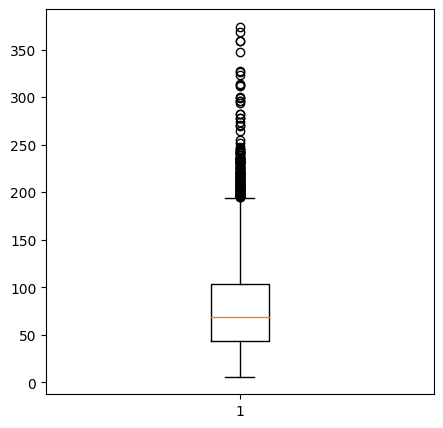

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [15]:
df[df.pre_clean_len > 140].head(10)

,sentiment,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


In [16]:
df.text[279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [17]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print(example1.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


In [18]:
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [19]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [20]:
df.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [21]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [22]:
df.text[226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [23]:
testing = df.text[226]
testing

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [24]:
df.text[175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [25]:
re.sub("[^a-zA-Z]", " ", df.text[175])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

In [26]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

<ipython-input-26-7185483af336>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


['awww that s a bummer you shoulda got david carr of third day to do it d',
 'is upset that he can t update his facebook by texting it and might cry as a result school today also blah',
 'i dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it s not behaving at all i m mad why am i here because i can t see you all over there',
 'not the whole crew',
 'need a hug',
 'hey long time no see yes rains a bit only a bit lol i m fine thanks how s you',
 'k nope they didn t have it',
 'que me muera',
 'spring break in plain city it s snowing',
 'i just re pierced my ears',
 'i couldn t bear to watch it and i thought the ua loss was embarrassing',
 'it it counts idk why i did either you never talk to me anymore',
 'i would ve been the first but i didn t have a gun not really though zac snyder s just a doucheclown',
 'i wish i got to watch it with you i miss you and how was the premiere',
 'hollis death scene will hurt

In [27]:
nums = [0,400000,800000,1200000,1600000]
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0], nums[1]):
    if (i+1) % 10000 == 0:
        print("Tweets %d of %d has been processed" % (i+1, nums[1]))
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))


Cleaning and parsing the tweets...



<ipython-input-26-7185483af336>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


Tweets 10000 of 400000 has been processed
Tweets 20000 of 400000 has been processed
Tweets 30000 of 400000 has been processed
Tweets 40000 of 400000 has been processed
Tweets 50000 of 400000 has been processed
Tweets 60000 of 400000 has been processed
Tweets 70000 of 400000 has been processed
Tweets 80000 of 400000 has been processed
Tweets 90000 of 400000 has been processed
Tweets 100000 of 400000 has been processed
Tweets 110000 of 400000 has been processed
Tweets 120000 of 400000 has been processed
Tweets 130000 of 400000 has been processed
Tweets 140000 of 400000 has been processed
Tweets 150000 of 400000 has been processed
Tweets 160000 of 400000 has been processed
Tweets 170000 of 400000 has been processed
Tweets 180000 of 400000 has been processed
Tweets 190000 of 400000 has been processed
Tweets 200000 of 400000 has been processed
Tweets 210000 of 400000 has been processed
Tweets 220000 of 400000 has been processed
Tweets 230000 of 400000 has been processed
Tweets 240000 of 400

In [28]:
len(clean_tweet_texts)

400000

In [29]:
nums = [0,400000,800000,1200000,1600000]
print("Cleaning and parsing the tweets...\n")
for i in range(nums[1], nums[2]):
    if (i+1) % 10000 == 0:
        print("Tweets %d of %d has been processed" % (i+1, nums[1]))
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...



<ipython-input-26-7185483af336>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


Tweets 410000 of 400000 has been processed
Tweets 420000 of 400000 has been processed
Tweets 430000 of 400000 has been processed
Tweets 440000 of 400000 has been processed
Tweets 450000 of 400000 has been processed
Tweets 460000 of 400000 has been processed
Tweets 470000 of 400000 has been processed
Tweets 480000 of 400000 has been processed
Tweets 490000 of 400000 has been processed
Tweets 500000 of 400000 has been processed
Tweets 510000 of 400000 has been processed
Tweets 520000 of 400000 has been processed
Tweets 530000 of 400000 has been processed
Tweets 540000 of 400000 has been processed
Tweets 550000 of 400000 has been processed
Tweets 560000 of 400000 has been processed
Tweets 570000 of 400000 has been processed
Tweets 580000 of 400000 has been processed
Tweets 590000 of 400000 has been processed
Tweets 600000 of 400000 has been processed
Tweets 610000 of 400000 has been processed
Tweets 620000 of 400000 has been processed
Tweets 630000 of 400000 has been processed
Tweets 6400

In [30]:
len(clean_tweet_texts)

800000

In [31]:
nums = [0,400000,800000,1200000,1600000]
print("Cleaning and parsing the tweets...\n")
for i in range(nums[2], nums[3]):
    if (i+1) % 10000 == 0:
        print("Tweets %d of %d has been processed" % (i+1, nums[1]))
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...



<ipython-input-26-7185483af336>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


Tweets 810000 of 400000 has been processed
Tweets 820000 of 400000 has been processed
Tweets 830000 of 400000 has been processed
Tweets 840000 of 400000 has been processed
Tweets 850000 of 400000 has been processed
Tweets 860000 of 400000 has been processed
Tweets 870000 of 400000 has been processed
Tweets 880000 of 400000 has been processed
Tweets 890000 of 400000 has been processed
Tweets 900000 of 400000 has been processed
Tweets 910000 of 400000 has been processed
Tweets 920000 of 400000 has been processed
Tweets 930000 of 400000 has been processed
Tweets 940000 of 400000 has been processed
Tweets 950000 of 400000 has been processed
Tweets 960000 of 400000 has been processed
Tweets 970000 of 400000 has been processed
Tweets 980000 of 400000 has been processed
Tweets 990000 of 400000 has been processed
Tweets 1000000 of 400000 has been processed
Tweets 1010000 of 400000 has been processed
Tweets 1020000 of 400000 has been processed
Tweets 1030000 of 400000 has been processed
Tweets 

In [32]:
nums = [0,400000,800000,1200000,1600000]
print("Cleaning and parsing the tweets...\n")
for i in range(nums[3], nums[4]):
    if (i+1) % 10000 == 0:
        print("Tweets %d of %d has been processed" % (i+1, nums[1]))
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...



<ipython-input-26-7185483af336>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


Tweets 1210000 of 400000 has been processed
Tweets 1220000 of 400000 has been processed
Tweets 1230000 of 400000 has been processed
Tweets 1240000 of 400000 has been processed
Tweets 1250000 of 400000 has been processed
Tweets 1260000 of 400000 has been processed
Tweets 1270000 of 400000 has been processed
Tweets 1280000 of 400000 has been processed
Tweets 1290000 of 400000 has been processed
Tweets 1300000 of 400000 has been processed
Tweets 1310000 of 400000 has been processed
Tweets 1320000 of 400000 has been processed
Tweets 1330000 of 400000 has been processed
Tweets 1340000 of 400000 has been processed
Tweets 1350000 of 400000 has been processed
Tweets 1360000 of 400000 has been processed
Tweets 1370000 of 400000 has been processed
Tweets 1380000 of 400000 has been processed
Tweets 1390000 of 400000 has been processed
Tweets 1400000 of 400000 has been processed
Tweets 1410000 of 400000 has been processed
Tweets 1420000 of 400000 has been processed
Tweets 1430000 of 400000 has bee

In [33]:
len(clean_tweet_texts)

1600000

In [34]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [35]:
clean_df.info

<bound method DataFrame.info of                                                       text  target
0        awww that s a bummer you shoulda got david car...       0
1        is upset that he can t update his facebook by ...       0
2        i dived many times for the ball managed to sav...       0
3           my whole body feels itchy and like its on fire       0
4        no it s not behaving at all i m mad why am i h...       0
...                                                    ...     ...
1599995  just woke up having no school is the best feel...       4
1599996  thewdb com very cool to hear old walt intervie...       4
1599997  are you ready for your mojo makeover ask me fo...       4
1599998  happy th birthday to my boo of alll time tupac...       4
1599999                               happy charitytuesday       4

[1600000 rows x 2 columns]>

In [36]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
data= pd.read_csv(csv,index_col=0)
data.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [37]:
data['text'] = data['text'].astype(str)
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens
data['text_tokens'] = data['text'].apply(tokenize_text)

In [39]:
data

,text,target,text_tokens
0,awww that s a bummer you shoulda got david car...,0,"[awww, that, s, a, bummer, you, shoulda, got, ..."
1,is upset that he can t update his facebook by ...,0,"[is, upset, that, he, can, t, update, his, fac..."
2,i dived many times for the ball managed to sav...,0,"[i, dived, many, times, for, the, ball, manage..."
3,my whole body feels itchy and like its on fire,0,"[my, whole, body, feels, itchy, and, like, its..."
4,no it s not behaving at all i m mad why am i h...,0,"[no, it, s, not, behaving, at, all, i, m, mad,..."
...,...,...,...
1599995,just woke up having no school is the best feel...,4,"[just, woke, up, having, no, school, is, the, ..."
1599996,thewdb com very cool to hear old walt intervie...,4,"[thewdb, com, very, cool, to, hear, old, walt,..."
1599997,are you ready for your mojo makeover ask me fo...,4,"[are, you, ready, for, your, mojo, makeover, a..."
1599998,happy th birthday to my boo of alll time tupac...,4,"[happy, th, birthday, to, my, boo, of, alll, t..."


In [40]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data['text_tokens']= data['text_tokens'].apply(lambda x: stemming_on_text(x))
data['text_tokens'].head()

0    [awww, that, s, a, bummer, you, shoulda, got, ...
1    [is, upset, that, he, can, t, update, his, fac...
2    [i, dived, many, times, for, the, ball, manage...
3    [my, whole, body, feels, itchy, and, like, its...
4    [no, it, s, not, behaving, at, all, i, m, mad,...
Name: text_tokens, dtype: object

In [41]:
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
data['text_tokens'] = data['text_tokens'].apply(lambda x: lemmatizer_on_text(x))
data['text_tokens'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


0    [awww, that, s, a, bummer, you, shoulda, got, ...
1    [is, upset, that, he, can, t, update, his, fac...
2    [i, dived, many, times, for, the, ball, manage...
3    [my, whole, body, feels, itchy, and, like, its...
4    [no, it, s, not, behaving, at, all, i, m, mad,...
Name: text_tokens, dtype: object

In [42]:
X=data.text
y=data.target

In [43]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [46]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))


No. of feature_words:  500000


In [48]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [50]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     40100
           4       0.79      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



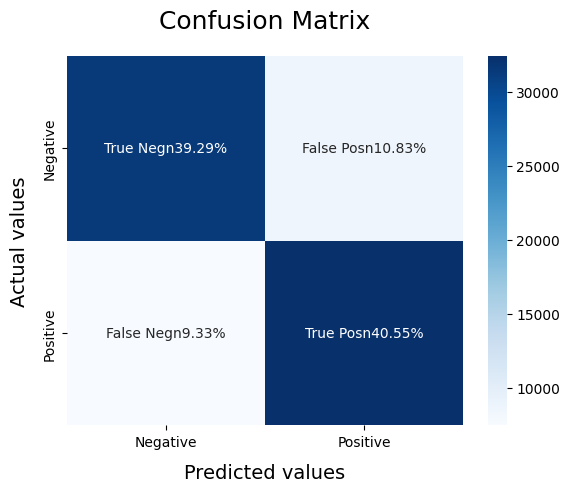

In [51]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

**Model 1**

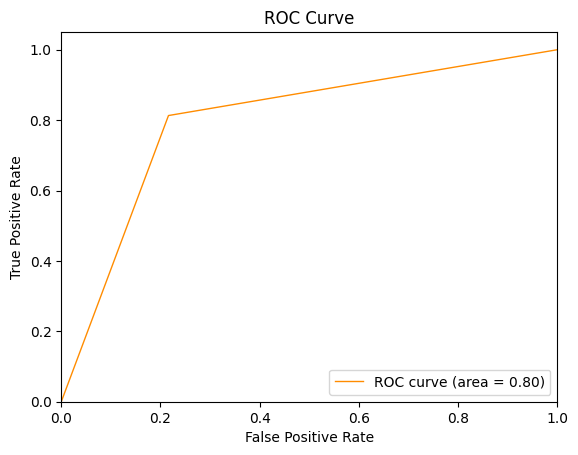

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming the positive class is represented by the label 4
pos_label = 4

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=pos_label)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


**Model 2**

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     40100
           4       0.81      0.82      0.81     39900

    accuracy                           0.81     80000
   macro avg       0.81      0.81      0.81     80000
weighted avg       0.81      0.81      0.81     80000



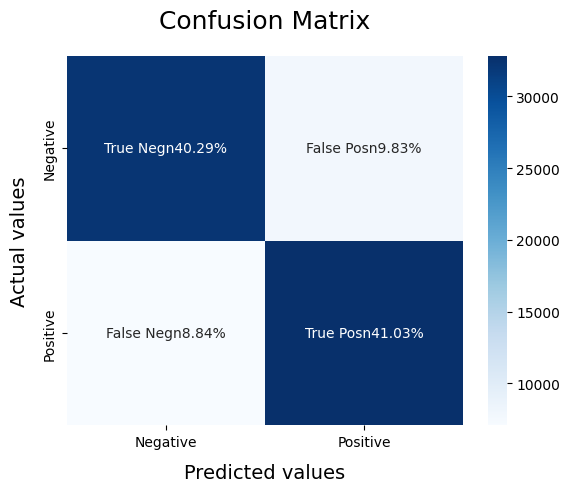

In [54]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

**Model 3**

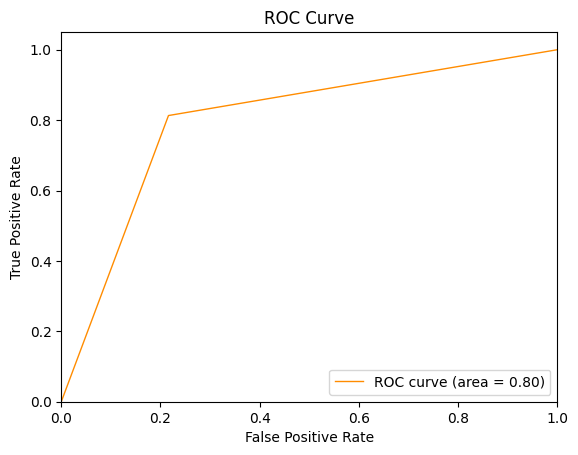

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Explicitly specify the positive label as 4
pos_label = 4

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=pos_label)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()




**model 3**

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     40100
           4       0.82      0.83      0.83     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



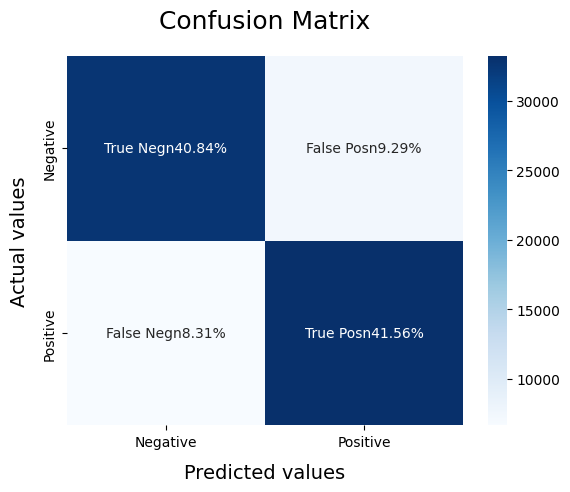

In [59]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

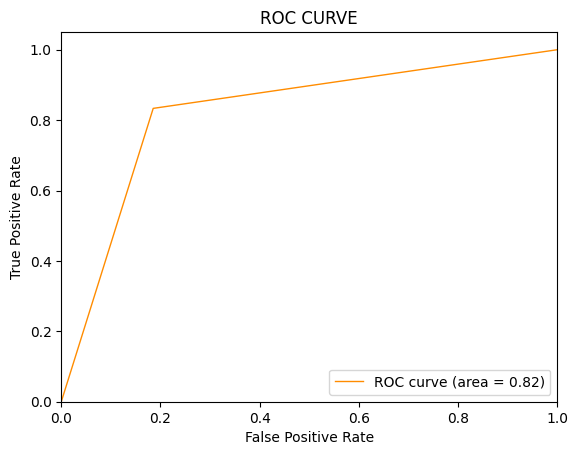

In [66]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3, pos_label=4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()



